In [ ]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv('CarDataset.csv')

#View the data
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
#Delete unnecessary data
df.drop('Unnamed: 0',axis=1,inplace=True)

#Basic information
df.info()

#Describe the data

df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
count,15411,15411,15411,15411.000000,1.541100e+04,15411,15411,15411,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
unique,121,32,120,NaN,NaN,3,5,2,NaN,NaN,NaN,NaN,NaN
top,Hyundai i20,Maruti,i20,NaN,NaN,Dealer,Petrol,Manual,NaN,NaN,NaN,NaN,NaN
freq,906,4992,906,NaN,NaN,9539,7643,12225,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.036338,5.561648e+04,NaN,NaN,NaN,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,NaN,NaN,NaN,3.013291,5.161855e+04,NaN,NaN,NaN,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,NaN,NaN,NaN,0.000000,1.000000e+02,NaN,NaN,NaN,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,NaN,NaN,NaN,4.000000,3.000000e+04,NaN,NaN,NaN,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,NaN,NaN,NaN,6.000000,5.000000e+04,NaN,NaN,NaN,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,NaN,NaN,NaN,8.000000,7.000000e+04,NaN,NaN,NaN,22.700000,1582.000000,117.300000,5.000000,8.250000e+05


In [ ]:
#Explore and categorize data

print("seller category unique variable: ")
print(df['seller_type'].unique())
print("\n")

print("fuel category unique variable: ")
print(df['fuel_type'].unique())
print("\n")

print("transmission category unique variable: ")
print(df['transmission_type'].unique())
print("\n")

print("seats category unique variable: ")
print(df['seats'].unique())

seller category unique variable: 
['Individual' 'Dealer' 'Trustmark Dealer']


fuel category unique variable: 
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


transmission category unique variable: 
['Manual' 'Automatic']


seats category unique variable: 
[5 8 7 6 4 2 9 0]


In [ ]:
#Clear data
df['seats'] = df['seats'].replace(0, 1)

#Check the data again
print("seats category unique variable: ")
print(df['seats'].unique())

seats category unique variable: 
[5 8 7 6 4 2 9 1]


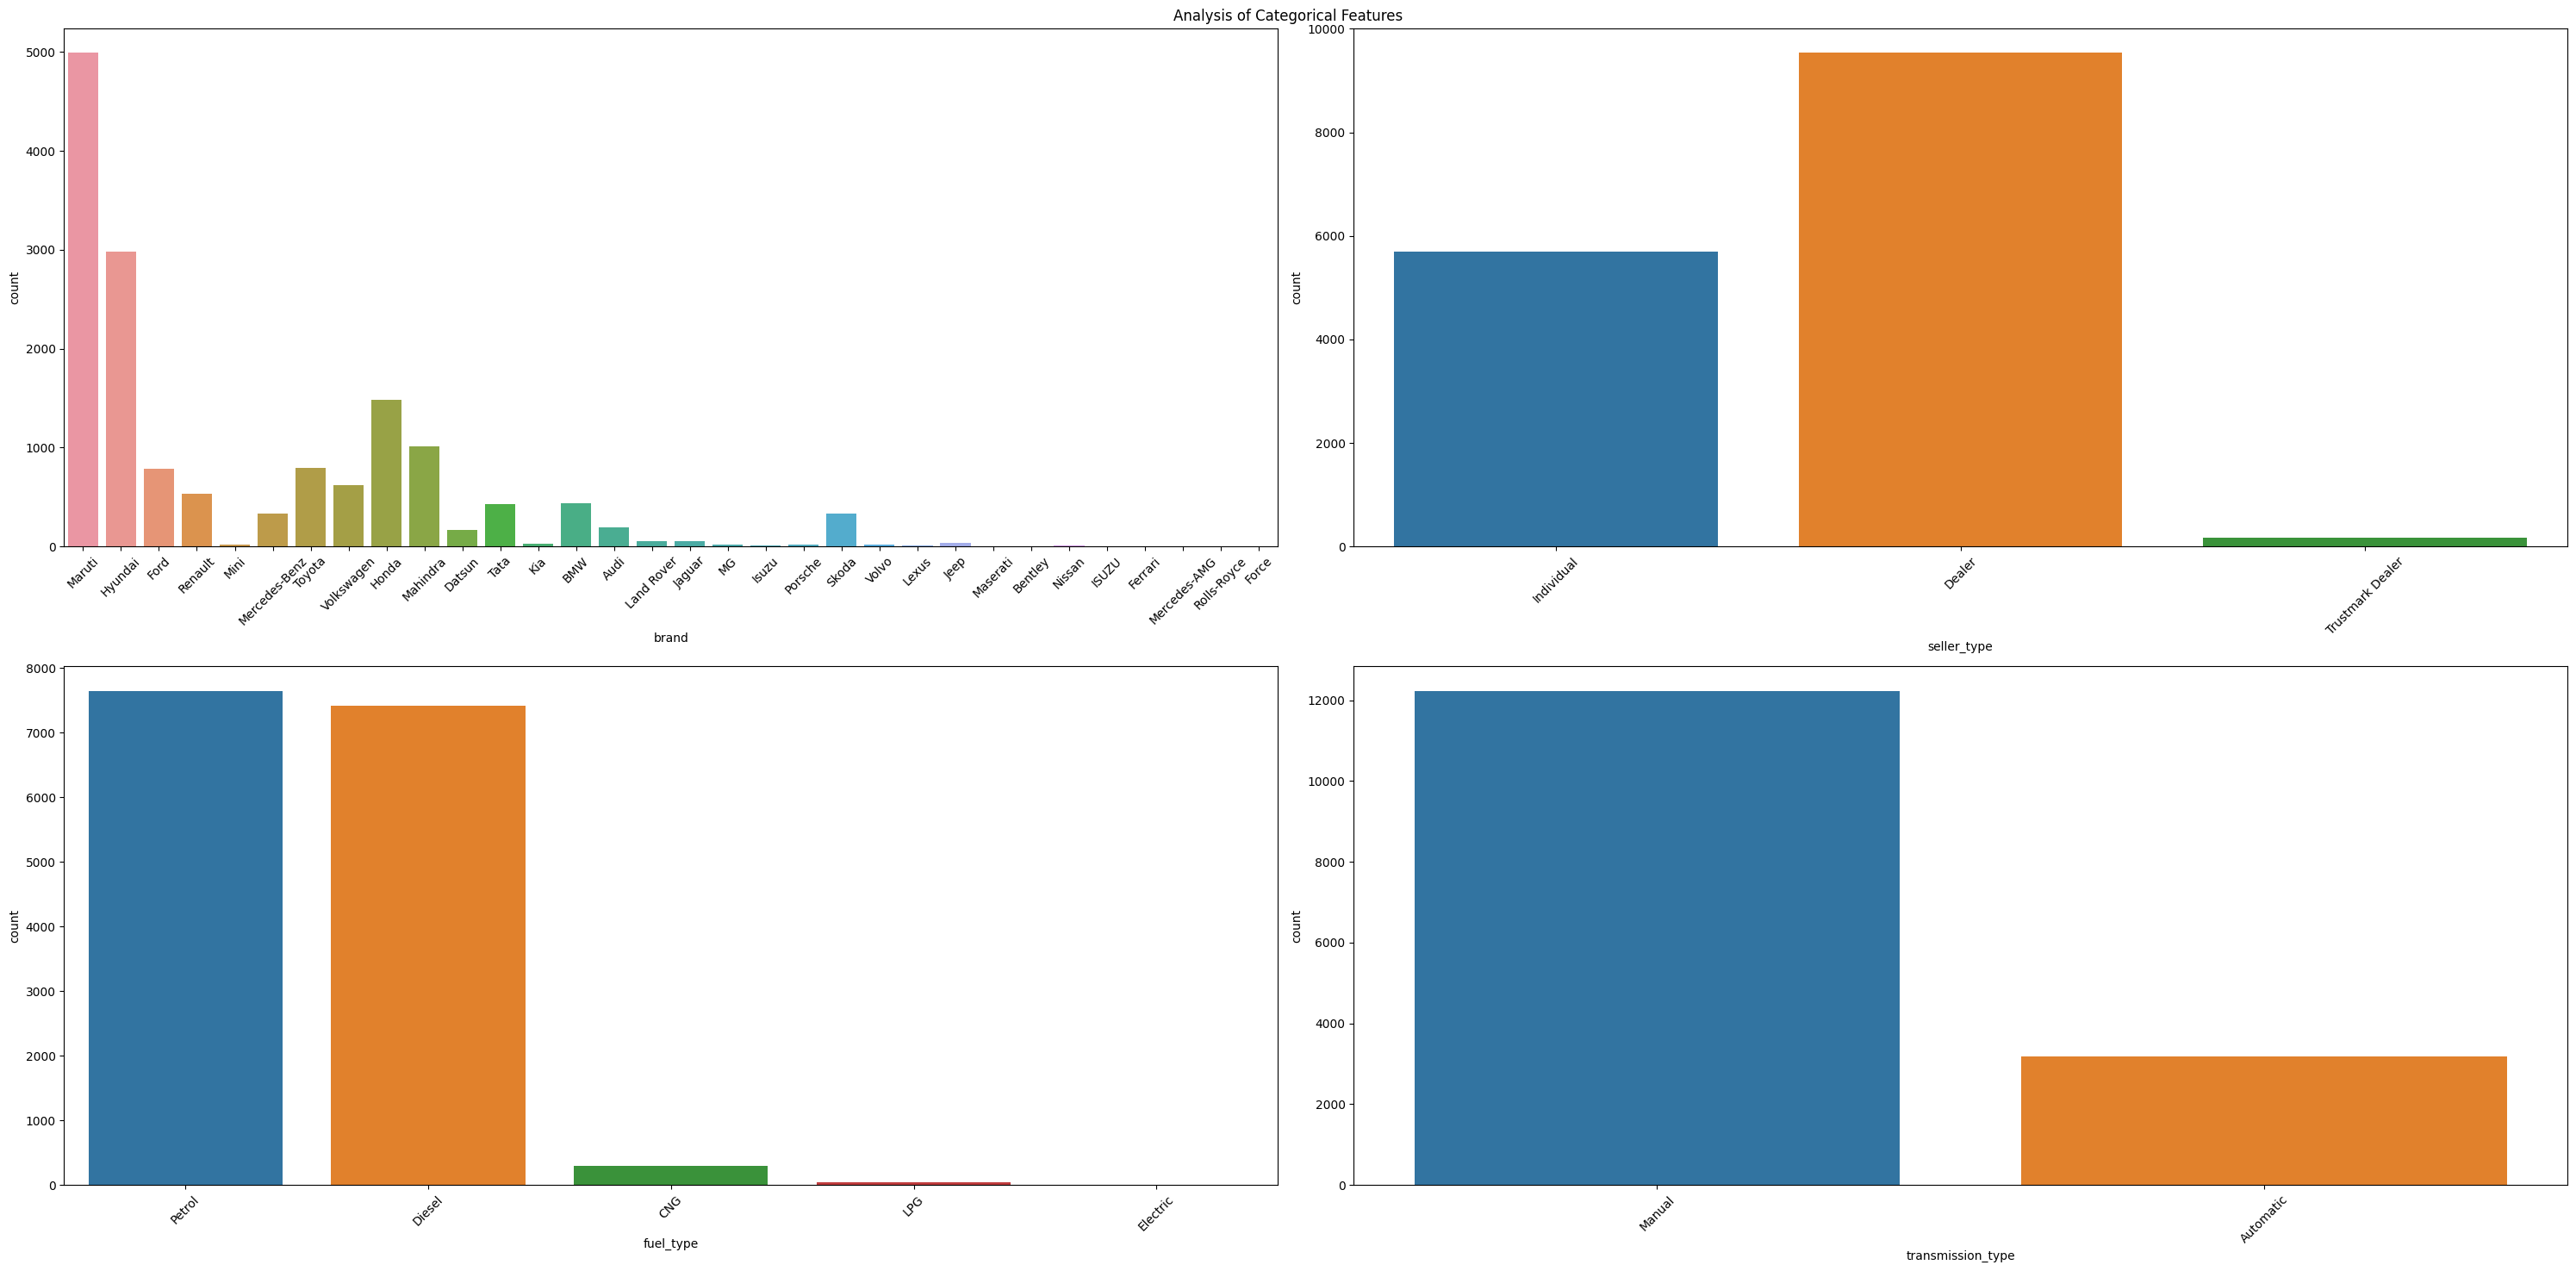

In [ ]:
#categorical features
plt.figure(figsize=(30,15))
plt.suptitle("Analysis of Categorical Features")
featrues = ['brand','seller_type','fuel_type','transmission_type']

for i in range(len(featrues)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[featrues[i]])
    plt.xlabel(featrues[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#So we know that Maruti brand sell the most used cars，and there are far more cars with manual transmission than automatic transmission

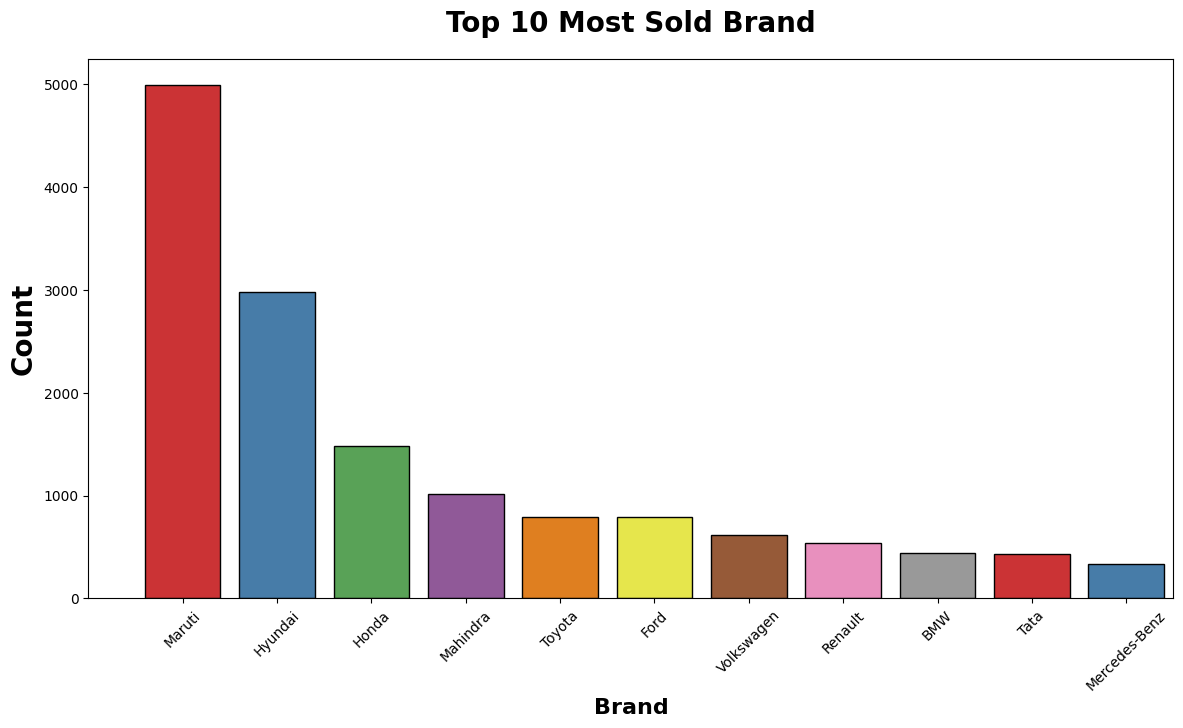

In [ ]:
plt.subplots(figsize = (14,7))
sns.countplot(x="brand",data=df,ec='black',palette="Set1",order=df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [ ]:
#Detect correlations between various data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
df[numeric_features].corr()


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<ipython-input-44-a30359996bdf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='CMRmap',annot=True)


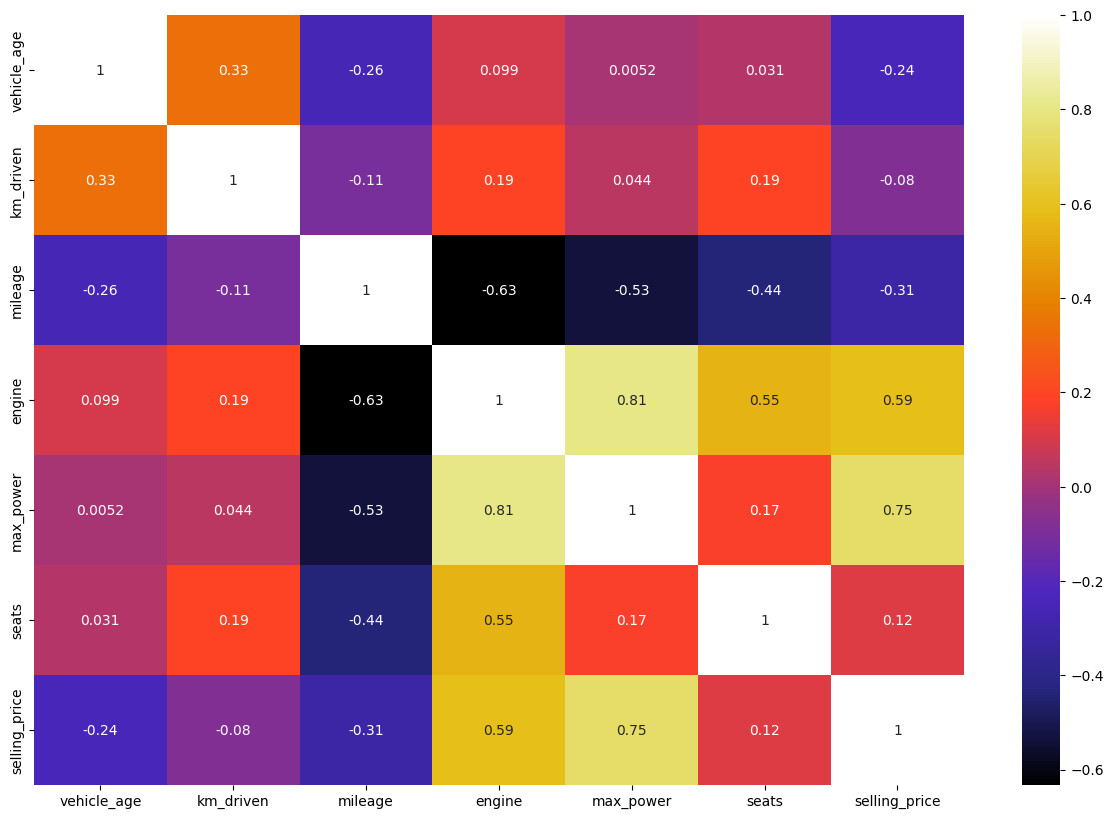

In [ ]:
#Use heatMap for easy to read the correlation
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True)
plt.show()


From this diagram we can know:

1 Older vehicles may have lower sales prices, and lower mileage

2 Bigger engine capacity will cause lower mileage

3 Vehicles with larger engine displacements generally have higher maximum power.

4 Bigger engine capaity or bigger max_power will cause higher price

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = df[['vehicle_age', 'mileage', 'engine', 'max_power', 'seats']]
target = df['selling_price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# View model coefficients
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
print(coefficients)



       Feature   Coefficient
0  vehicle_age -68616.856874
1      mileage  13092.624947
2       engine     60.607229
3    max_power  15803.838870
4        seats     88.104279


Through the model coefficients of the linear regression, we can know the impact of each feature on the price. The age of the car has the greatest negative impact on the price. Mileage and max power will increase the price. Engine and seats have almost no impact.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a decision tree regression model
model = DecisionTreeRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions_df = model.predict(X_test)

predictions_df = pd.DataFrame({'Predicted_Price': predictions_df, 'Actual_Price': y_test.values})

predictions_df['Predicted_Price'] = predictions_df['Predicted_Price'].apply(lambda x: '{:.2f}'.format(x))
predictions_df['Predicted_Price'] = predictions_df['Predicted_Price'].astype(float)

# print the predicted price and the actual price
print(predictions_df.head())
print(predictions_df.tail())

   Predicted_Price  Actual_Price
0        225722.22        190000
1        686666.67        600000
2        607111.11        665000
3       1150000.00       1570000
4        167407.41        160000
      Predicted_Price  Actual_Price
3078        321500.00        295000
3079        780000.00        840000
3080        780000.00        790000
3081        416933.33        440000
3082        940000.00        861000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model on the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
predictions_rf = model_rf.predict(X_test)

predictions_rf = pd.DataFrame({'Predicted_Price': predictions_rf, 'Actual_Price': y_test.values})

predictions_rf['Predicted_Price'] = predictions_rf['Predicted_Price'].apply(lambda x: '{:.2f}'.format(x))
predictions_rf['Predicted_Price'] = predictions_rf['Predicted_Price'].astype(float)

# print the predicted price and the actual price
print(predictions_rf.head())
print(predictions_rf.tail())

   Predicted_Price  Actual_Price
0        224891.60        190000
1        684652.11        600000
2        606989.03        665000
3       1083674.67       1570000
4        166567.84        160000
      Predicted_Price  Actual_Price
3078        319200.43        295000
3079        766102.95        840000
3080        766102.95        790000
3081        418083.90        440000
3082        890220.75        861000


In [ ]:
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("The R-squared of decesion tree model")
r2 = r2_score(y_test, predictions_df['Predicted_Price'])
print(f"R-squared (R²): {r2}\n")

print("The R-squared of random forest model")
r2_rf = r2_score(y_test, predictions_rf['Predicted_Price'])
print(f"R-squared (R²): {r2_rf}")



The R-squared of decesion tree model
R-squared (R²): 0.909554322226186

The R-squared of random forest model
R-squared (R²): 0.9209811426632158


R-squared represents the proportion of data variance explained by the model. The closer it is to 1, the stronger the model's ability to explain the target variable. Therefore, the random forest model better predicts the price of used cars.